# **PHÂN TÍCH KHÁM PHÁ VỀ BỆNH ĐÁI THÁO ĐƯỜNG**

# Thống kê mô tả

In [1]:
# importing pandas, and other necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Đường dẫn tới file CSV
file_path = "diabetes.csv"

# Đọc file CSV
df = pd.read_csv(file_path)

In [5]:
# In 5 dòng đầu tiên
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Kích thước tập dữ liệu
print(df.shape)

(768, 9)


In [7]:
# Thông tin tổng quan về tập dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# Kiểm tra giá trị null
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
# Bảng thống kê mô tả cho các cột ( kiểu dữ liệu số )
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# đếm số lần xuất hiện của từng giá trị trong biến mục tiêu
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [11]:
# tính hệ số tương quan Pearson
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


# Xử lý & Trực quan hóa dữ liệu

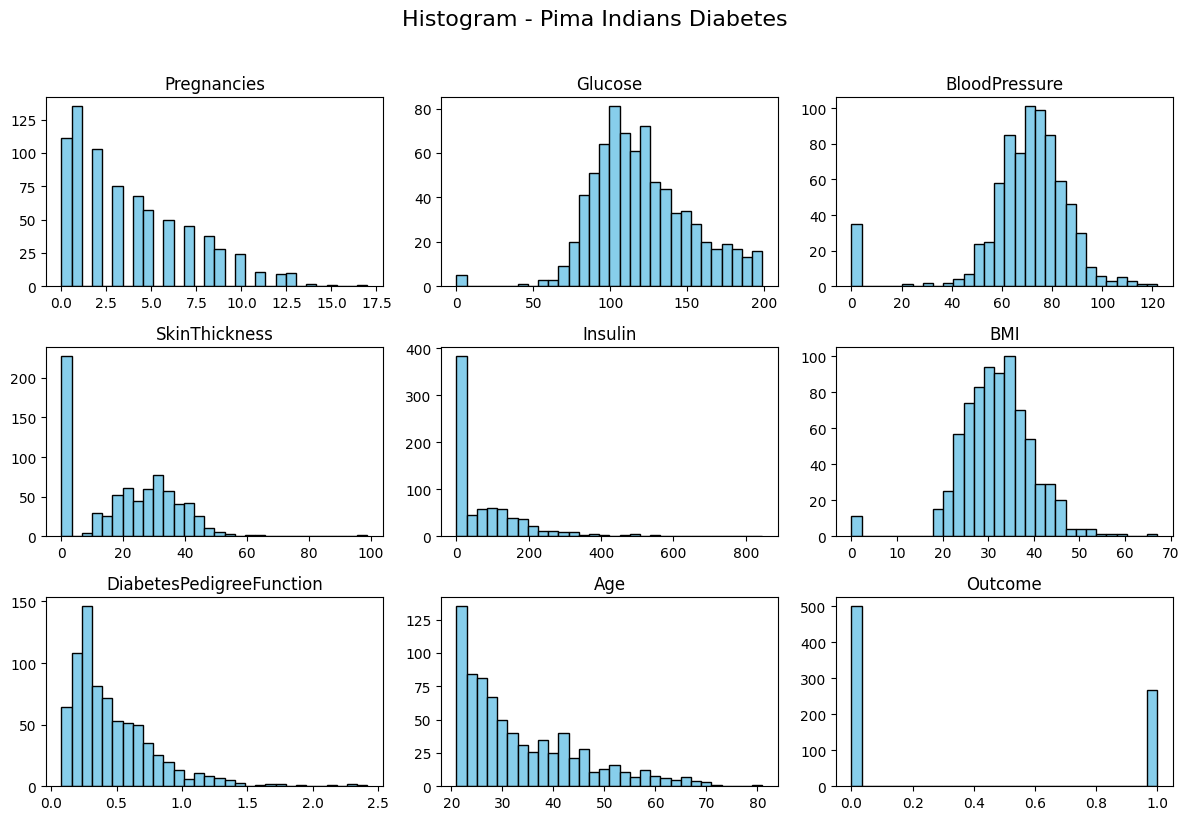

In [12]:
# histogram
axes = df.hist(
    figsize=(12, 8),
    layout=(3, 3),
    bins=30,
    color="skyblue",
    edgecolor="black",
    grid=False
)

plt.suptitle("Histogram - Pima Indians Diabetes", fontsize=16, y=1.02)
plt.tight_layout()

# Lưu file PDF
# plt.savefig("histogram.pdf", format="pdf", bbox_inches="tight")
plt.show()



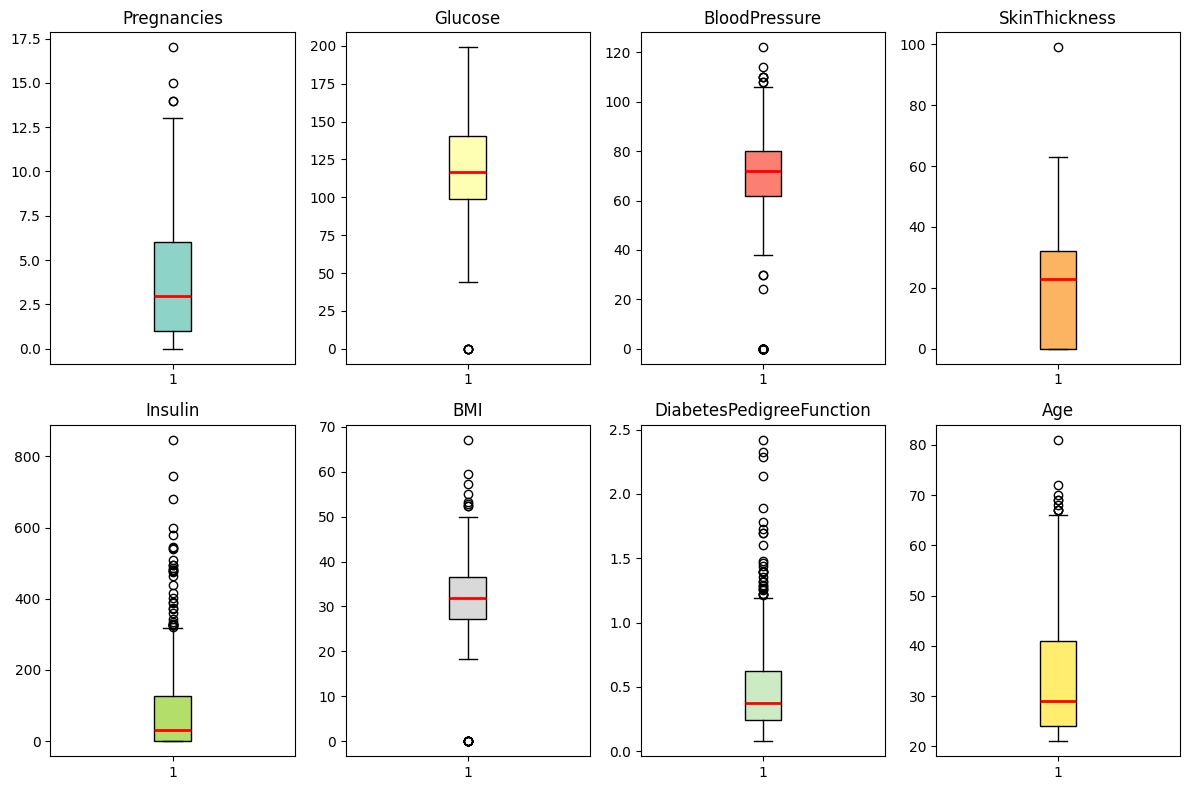

In [ ]:
num_cols = df.select_dtypes(include='number').columns.drop('Outcome')
n = len(num_cols)
ncols = 4
nrows = int(np.ceil(n / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(12, 4*nrows))
axes = axes.flatten()  # chuyển về 1D để dễ duyệt

colors = plt.cm.Set3(np.linspace(0, 1, n))  # chọn bảng màu

# Vẽ boxplot cho từng cột
for i, col in enumerate(num_cols):
    axes[i].boxplot(df[col].dropna(), patch_artist=True,
                    boxprops=dict(facecolor=colors[i], color="black"),
                    medianprops=dict(color="red", linewidth=2),
                    whiskerprops=dict(color="black"),
                    capprops=dict(color="black"))
    axes[i].set_title(f"{col}")
    # axes[i].set_ylabel(col)

# Xóa subplot trống (nếu số biến lẻ)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

# plt.savefig("boxplot.pdf", format="pdf", bbox_inches="tight")
plt.show()



## Glucose

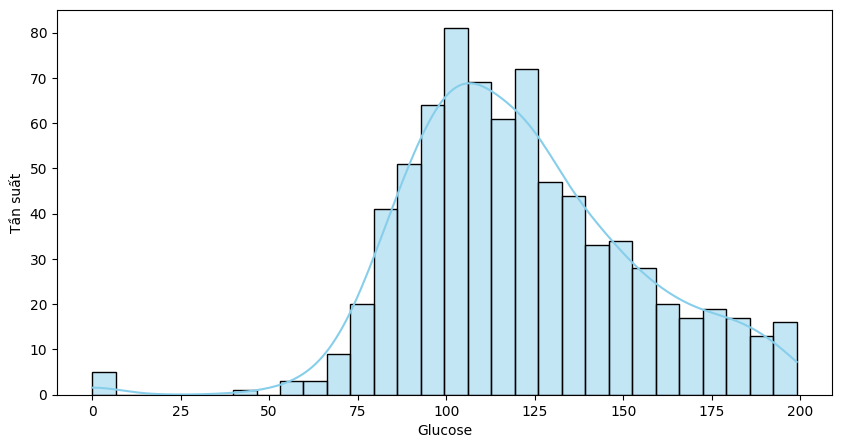

In [ ]:
# Histogram
plt.figure(figsize=(10,5))
sns.histplot(df['Glucose'], kde=True, bins=30, color="skyblue")
plt.xlabel('Glucose')
plt.ylabel("Tần suất")
# plt.savefig("glucose_histogram.pdf", format="pdf", bbox_inches="tight")
plt.show()



**Nhận xét**
*  Hình dạng phân phối : Biểu đồ có dạng lệch phải, số lượng người có mức glucose cao hơn mức bình thường (100-140 mg/dL) chiếm đa số, trong khi một số ít có giá trị glucose rất cao kéo dài về bên phải.

*  Giá trị trung tâm : 120 mg/dL (cao hơn mức bình thường) - tiền đái tháo đường

*   Độ phân tán : Khoảng giá trị rộng (155 mg/dL), so với mức glucose máu bình thường (khoảng 70 – 99 mg/dL), khoảng 45 – 200 mg/dL cho thấy dữ liệu trải dài từ thấp hơn mức bình thường đến cao hơn rất nhiều mức chẩn đoán tiểu đường. Cho thấy độ phân tán lớn, mẫu dữ liệu có sự biến thiên mạnh giữa các cá nhân.

*   Giá trị ngoại lai (outliers) : Về mặt y sinh học, glucose trong máu không thể bằng 0 (vì như vậy con người không thể sống). Do đó, giá trị 0 không phải dữ liệu thật, mà có thể là dữ liệu thiếu được ghi thành 0, hoặc lỗi do nhập liệu hoặc thu thập số liệu. Nên thay thế bằng NaN, sau đó dùng phương pháp điền giá trị (mean/median) hoặc loại bỏ trước khi được đưa vào mô hình máy học, tránh làm sai lệch thống kê.



---


*   Từ 70 → 100 mg/dL: đây là vùng glucose bình thường, nhiều người nằm trong khoảng này.

*   100 → 140 mg/dL: tần suất cao nhất, cho thấy đa số người trong tập dữ liệu có nguy cơ tiền tiểu đường.

*   140 → 200 mg/dL: tần suất giảm dần, nhưng vẫn còn rất nhiều trường hợp, đây là nhóm có nguy cơ hoặc đang mắc tiểu đường cao hoặc phản ánh nhóm bệnh nặng.


/tmp/ipython-input-772427705.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_data.index, y=count_data.values, palette="Set2")


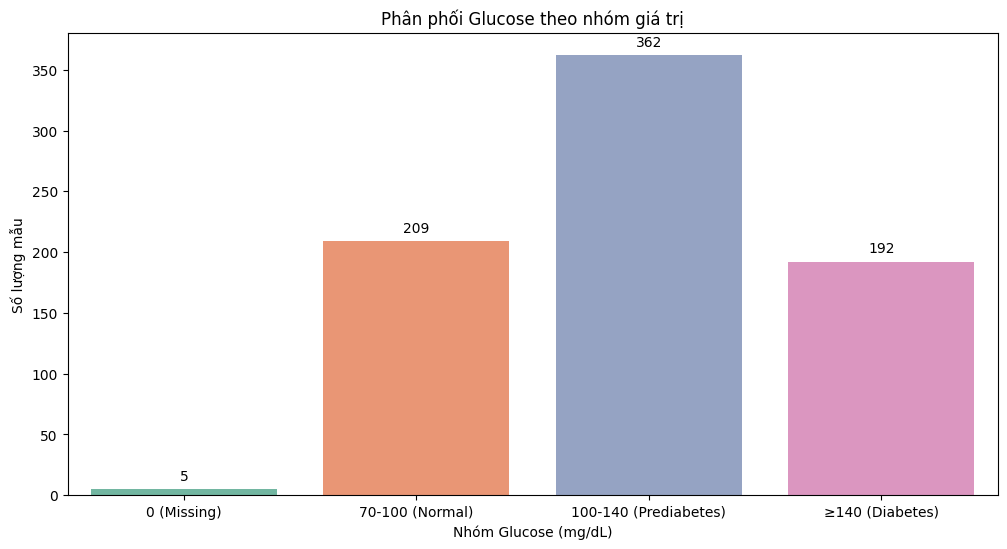

In [ ]:
# Biểu đồ phân phối các nhóm Glucose
bins = [-1, 0, 100, 140, df["Glucose"].max()]
labels = ["0 (Missing)", "70-100 (Normal)", "100-140 (Prediabetes)", "≥140 (Diabetes)"]

df["Glucose_Group"] = pd.cut(df["Glucose"], bins=bins, labels=labels)
count_data = df["Glucose_Group"].value_counts().sort_index()

# Vẽ biểu đồ cột
plt.figure(figsize=(12,6))
sns.barplot(x=count_data.index, y=count_data.values, palette="Set2")

for i, v in enumerate(count_data.values):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')

plt.title("Phân phối Glucose theo nhóm giá trị")
plt.xlabel("Nhóm Glucose (mg/dL)")
plt.ylabel("Số lượng mẫu")

# plt.savefig("glucoseGroup_bar.pdf", format="pdf", bbox_inches="tight")
plt.show()


**Kết luận chung**


*   Phân phối glucose trong dữ liệu lệch phải, tập trung nhiều ở vùng tiền tiểu đường và tiểu đường.
*   Giá trị trung tâm nằm ở mức trên ngưỡng bình thường, độ phân tán lớn và tồn tại một số ngoại lai quan trọng

*   Chú ý trong phân tích thống kê, chuẩn hóa dữ liệu hoặc xử lý ngoại lai khi xây dựng mô hình.



**Câu hỏi đặt ra :**
Bệnh nhân có đường huyết từ bao nhiêu thì được chẩn đoán chắc chắn là mắc bệnh đái tháo đường ? Ngoài nồng độ glucose trong máu, còn đặc trưng nào ảnh hưởng đến việc chẩn đoán bênh tiểu đường?

## BloodPressure

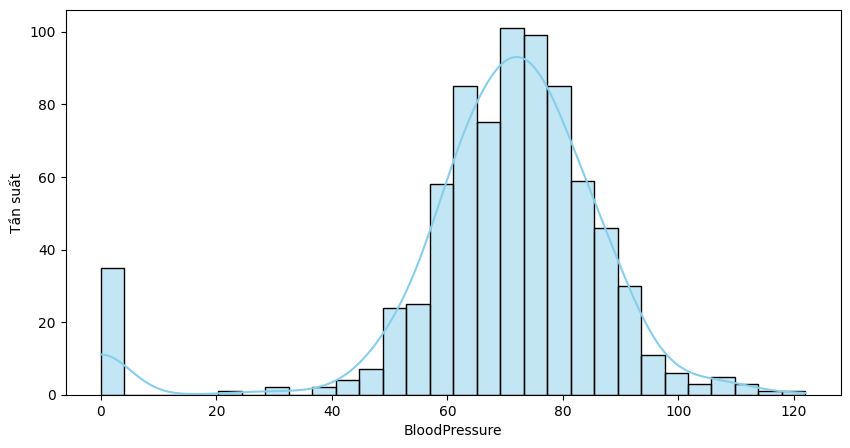

In [ ]:
# Histogram
plt.figure(figsize=(10,5))
sns.histplot(df['BloodPressure'], kde=True, bins=30, color="skyblue")
plt.xlabel('BloodPressure')
plt.ylabel("Tần suất")

# plt.savefig("BloodPressure_histogram.pdf", format="pdf", bbox_inches="tight")
plt.show()


**Nhận xét**

*   Hình dạng phân phối : Biểu đồ phân phối của BloodPressure có dạng gần chuẩn (bell-shaped), đa số người có huyết áp tâm trương (diastolic BP) tập trung quanh mức 70–80 mmHg.

*   Giá trị trung tâm : khoảng 72 mmHg, đây là mức huyết áp tâm trương bình thường theo tiêu chuẩn y tế (60–80 mmHg).

*   Độ phân tán : Biến thiên từ ~40 đến hơn 120 mmHg, độ lệch chuẩn khoảng 12 mmHg, cho thấy dữ liệu không quá phân tán.

*   Giá trị ngoại lai : Có nhiều giá trị = 0 mmHg, điều này không có ý nghĩa sinh lý (không thể có huyết áp bằng 0). Một số giá trị cao >110 mmHg có thể coi là ngoại lai, phản ánh người bị tăng huyết áp nặng.

---

*Xét các khoảng giá trị :*

*   0 (Missing): Có một tỷ lệ đáng kể dữ liệu bằng 0, đây không phải giá trị thực tế mà là giá trị thiếu.

*   Dưới 60 : Số lượng nhóm này tương đối ít, đây là nhóm có huyết áp tâm trương thấp, có thể liên quan đến suy dinh dưỡng, bệnh tim mạch hoặc mất máu.

*   60–80 mmHg: tần suất cao nhất → đây là vùng huyết áp bình thường, chiếm đa số

*   80–100 mmHg: số lượng giảm dần, phản ánh nhóm tiền tăng huyết áp

*   Trên 100 mmHg: ít xuất hiện, nhưng phản ánh một số trường hợp tăng huyết áp rõ rệt.






/tmp/ipython-input-1987212651.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_data.index, y=count_data.values, palette="Set1")


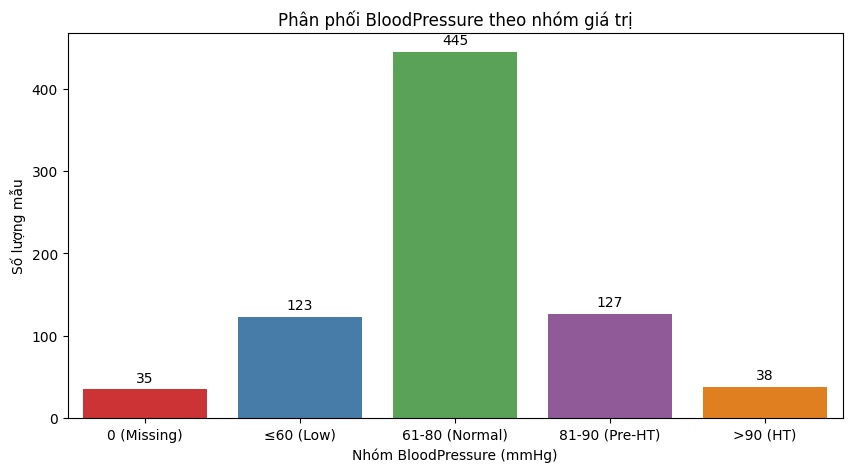

In [ ]:
# Biểu đồ phân phối các nhóm BloodPressure
bins = [-1, 0, 60, 80, 90, df["BloodPressure"].max()]
labels = ["0 (Missing)", "≤60 (Low)", "61-80 (Normal)", "81-90 (Pre-HT)", ">90 (HT)"]

df["BP_Group"] = pd.cut(df["BloodPressure"], bins=bins, labels=labels)

count_data = df["BP_Group"].value_counts().sort_index()

# Vẽ biểu đồ cột
plt.figure(figsize=(10,5))
sns.barplot(x=count_data.index, y=count_data.values, palette="Set1")

for i, v in enumerate(count_data.values):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')

plt.title("Phân phối BloodPressure theo nhóm giá trị")
plt.xlabel("Nhóm BloodPressure (mmHg)")
plt.ylabel("Số lượng mẫu")

# plt.savefig("BloodPressure_group_bar.pdf", format="pdf", bbox_inches="tight")
plt.show()


**Kết luận chung**

*   Phân phối BloodPressure chủ yếu tập trung ở mức bình thường (60–80 mmHg),  độ phân tán vừa phải, nhưng có nhiều giá trị ngoại lai bằng 0 cần xử lý.

*   Một số ít trường hợp huyết áp cao bất thường (>100 mmHg) cho thấy sự đa dạng của mẫu nghiên cứu.

*   Trong khi nồng độ glucose chiếm đa số ở mức khá cao, thì huyết áp theo kết quả khảo sát lại ở mức bình thường, cho thấy đặc trưng không quá ảnh hưởng đến outcome. Nếu muốn chắc chắn hơn, có thể phân tích mối tương quan ở các khoảng giá trị thiểu số.

**Câu hỏi đặt ra:** Huyết áp cao hay thấp bất thường có ảnh hưởng gì đến kết quả chẩn đoán bệnh tiểu đường không?

## Age

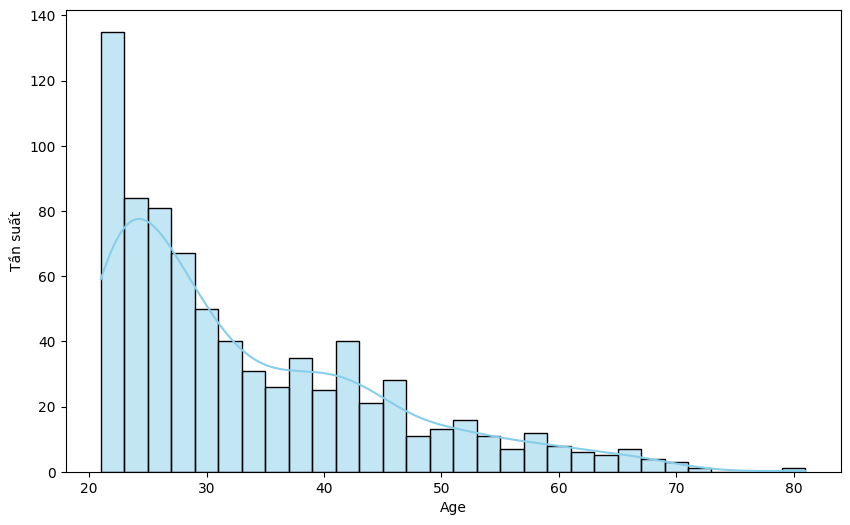

In [ ]:
# Histogram
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], kde=True, bins=30, color="skyblue")
plt.xlabel('Age')
plt.ylabel("Tần suất")

# plt.savefig("age_histogram.pdf", format="pdf", bbox_inches="tight")
plt.show()


**Nhận xét**

*   Hình dạng phân phối : Biểu đồ phân phối của Age có dạng lệch phải (right-skewed), phần lớn người tham gia nghiên cứu nằm trong nhóm tuổi 20–40, ít dần khi tuổi tăng.

*   Giá trị trung tâm : khoảng 30 tuổi, điều này cho thấy quần thể nghiên cứu chủ yếu là người trưởng thành trẻ và trung niên.

*   Độ phân tán : độ tuổi trải rộng từ 21 đến 81, cho thấy độ phân tán khá lớn.

*   Giá trị ngoại lai : Một số giá trị rất cao (70–80 tuổi) có thể coi là ngoại lai theo ngữ cảnh, nhưng vẫn có ý nghĩa thực tế (người già).

---

*Xét các khoảng giá trị :*

*   20–30 tuổi: tần suất cao nhất, nhóm này chiếm đa số trong tổng mẫu khảo sát.
*   30–40 tuổi: tần suất giảm dần, nhưng vẫn có số lượng đáng kể.
*   40–60 tuổi: chiếm tỷ lệ khá lớn, có thể do đây là độ tuổi thường được xét nghiệm tầm soát.
*   Trên 60 tuổi: ít xuất hiện, chỉ một nhóm nhỏ người cao tuổi trong dữ liệu.
















/tmp/ipython-input-209631400.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_counts.index, y=age_counts.values, palette="Set3")


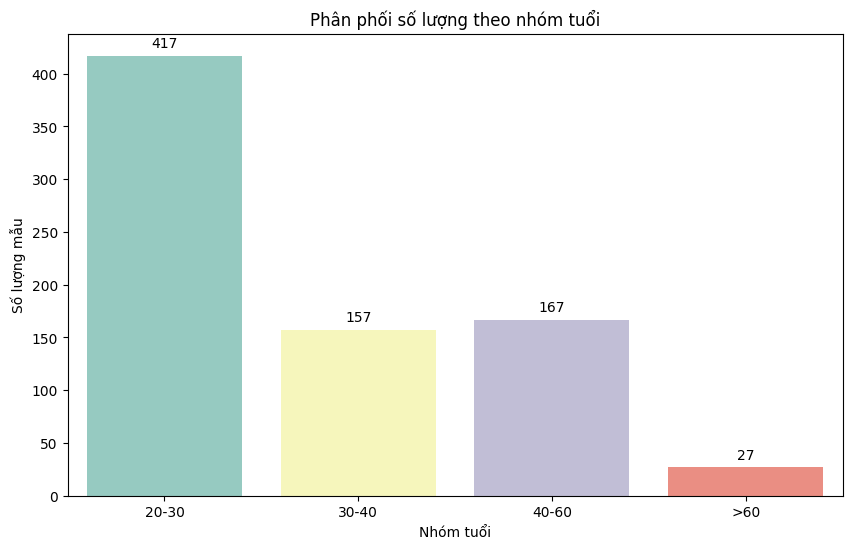

In [ ]:
# Biểu đồ phân phối các nhóm tuổi (Age)
bins = [19, 30, 40, 60, df["Age"].max()]
labels = ["20-30", "30-40", "40-60", ">60"]

df["Age_Group"] = pd.cut(df["Age"], bins=bins, labels=labels)

# Đếm số lượng trong từng nhóm
age_counts = df["Age_Group"].value_counts().sort_index()

# Vẽ biểu đồ cột
plt.figure(figsize=(10,6))
sns.barplot(x=age_counts.index, y=age_counts.values, palette="Set3")

# Thêm nhãn số lượng
for i, v in enumerate(age_counts.values):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')

plt.title("Phân phối số lượng theo nhóm tuổi")
plt.xlabel("Nhóm tuổi")
plt.ylabel("Số lượng mẫu")

# plt.savefig("ageGroup_bar.pdf", format="pdf", bbox_inches="tight")
plt.show()


**Kết luận chung**

*   Tuổi trong dataset tập trung nhiều ở nhóm 20–40, phản ánh quần thể nghiên cứu chủ yếu là người trưởng thành và trung niên.
*   Khi phân tích, có thể chia nhóm tuổi (ví dụ: <30, 30–40, 40–60, >60) để dễ so sánh nguy cơ tiểu đường giữa các nhóm tuổi.

**Câu hỏi đặt ra :** Độ tuổi nào có nguy cơ mắc bệnh tiểu đường cao nhất? Và ở độ tuổi này, cho biết nguyên nhân chủ quan (lối sống, ăn uống, thói quen sinh hoạt) có thể dẫn đến nguy cơ mắc bệnh ?

## SkinThickness

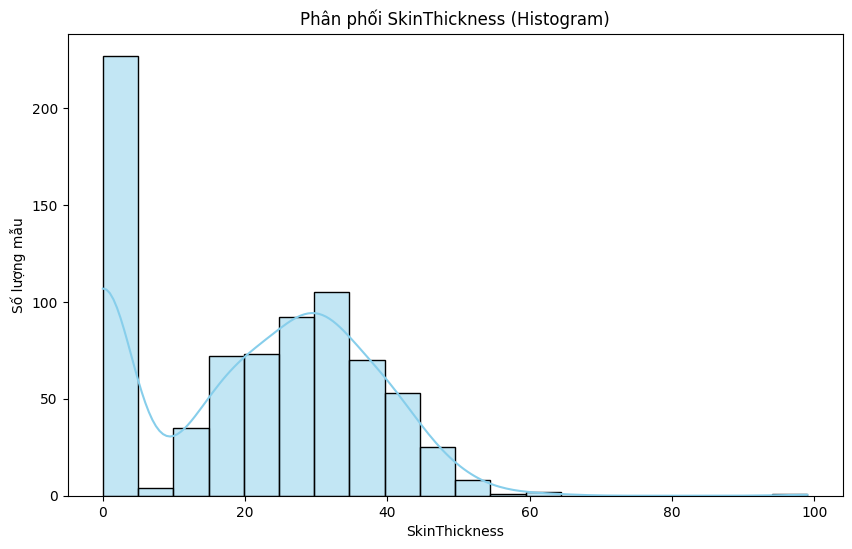

In [ ]:
# Histogram
plt.figure(figsize=(10,6))
sns.histplot(df["SkinThickness"], bins=20, kde=True, color="skyblue")
plt.title("Phân phối SkinThickness (Histogram)")
plt.xlabel("SkinThickness")
plt.ylabel("Số lượng mẫu")

# plt.savefig("skinThickness_histogram.pdf", format="pdf", bbox_inches="tight")
plt.show()

**Nhận xét**

*   Hình dạng phân phối : Biểu đồ phân phối khá lệch phải (right-skewed),
nhiều người có giá trị thấp (10–30 mm), còn số lượng giảm dần khi giá trị cao hơn.

*   Giá trị trung tâm : khoảng 20 mm, đây là mức phổ biến trong nghiên cứu về béo phì và tiểu đường

*   Độ phân tán : Khoảng giá trị từ 0 đến hơn 90 mm, độ lệch chuẩn lớn (~16 mm), cho thấy dữ liệu phân tán rộng.

*   Giá trị ngoại lai : Có khá nhiều giá trị = 0 (30% tập dữ liệu). Một số giá trị rất cao (>70 mm) có thể coi là ngoại lai, nhưng vẫn phản ánh người có mỡ dưới da dày.

---

*Xét các khoảng giá trị :*

*   0 mm: Chiếm tỉ lệ khá cao(30%), nhưng không hợp lý về sinh học, nên cần được xử lý.

*   1–10 mm: Có một số lượng nhỏ mẫu, đây là nhóm có độ dày nếp da rất mỏng, thường gặp ở người gầy.

*   11–30 mm: tần suất cao nhất, đây là mức điển hình.

*   30–50 mm: số lượng giảm dần nhưng vẫn đáng kể, phản ánh nhóm có tích mỡ nhiều hơn, có nguy cơ liên quan đến béo phì và tiểu đường.

*   Trên 50 mm: ít xuất hiện, thuộc nhóm có mỡ dưới da dày bất thường.







/tmp/ipython-input-3358326895.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_data.index, y=count_data.values, palette="Set2")


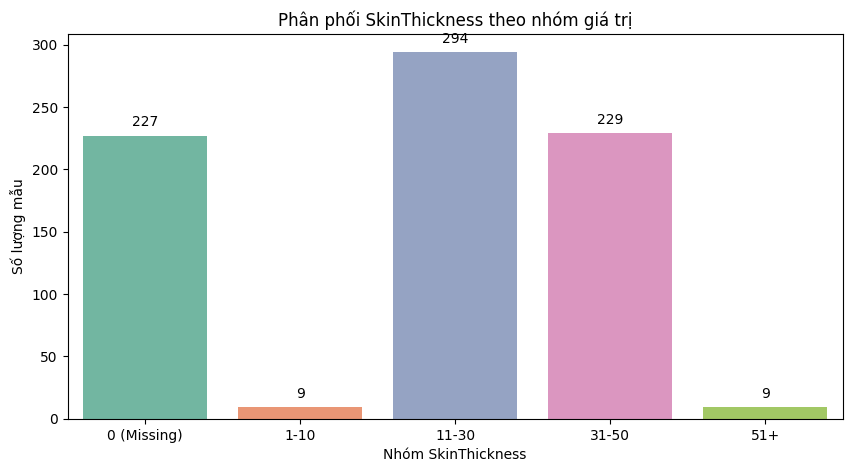

In [ ]:
# Biểu đồ phân phối các nhóm SkinThickness
bins = [-1, 0, 10, 30, 50, df["SkinThickness"].max()]
labels = ["0 (Missing)", "1-10", "11-30", "31-50", "51+"]

df["Skin_Group"] = pd.cut(df["SkinThickness"], bins=bins, labels=labels)
count_data = df["Skin_Group"].value_counts().sort_index()

# Vẽ biểu đồ cột
plt.figure(figsize=(10,5))
sns.barplot(x=count_data.index, y=count_data.values, palette="Set2")
for i, v in enumerate(count_data.values):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')

plt.title("Phân phối SkinThickness theo nhóm giá trị")
plt.xlabel("Nhóm SkinThickness")
plt.ylabel("Số lượng mẫu")

# plt.savefig("STgroup_bar.pdf", format="pdf", bbox_inches="tight")
plt.show()



**Kết luận chung**


*   Phân phối SkinThickness lệch phải, tập trung ở vùng 10–30 mm.
*   Tỉ lệ giá trị 0 cao bất thường, việc thiếu dữ liệu nhiều (227/768 mẫu ~30%) chủ yếu do khó khăn trong đo lường thực tế hoặc có thể không thực sự quan trọng hay được cho là tương quan cao (đến mức trùng lặp) với một đặc trưng khác (có thể là BMI).
*   Một số giá trị cao (70–90 mm) có thể là ngoại lai nhưng vẫn phản ánh thực tế sinh học.



**Câu hỏi đặt ra:**
*  Người có SkinThickness cao có khả năng mắc tiểu đường cao hơn không?
*  SkinThickness phản ánh lớp mỡ dưới da, có liên quan chặt chẽ đến BMI (chỉ số khối cơ thể), vậy người có BMI cao (béo phì) có SkinThickness cao hơn không?

## Insulin

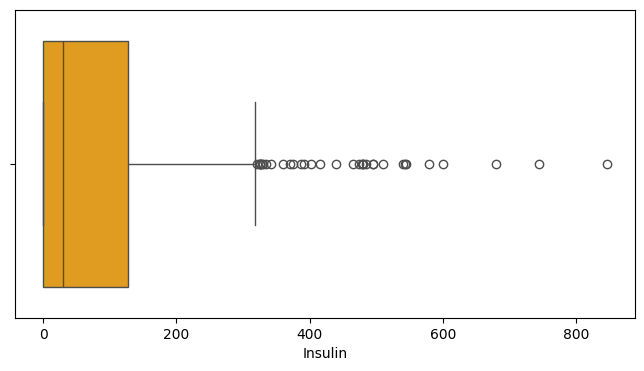

In [ ]:
# Box Plot
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Insulin'], color="orange")
plt.xlabel('Insulin')

# plt.savefig("insulin_box.pdf", format="pdf", bbox_inches="tight")
plt.show()

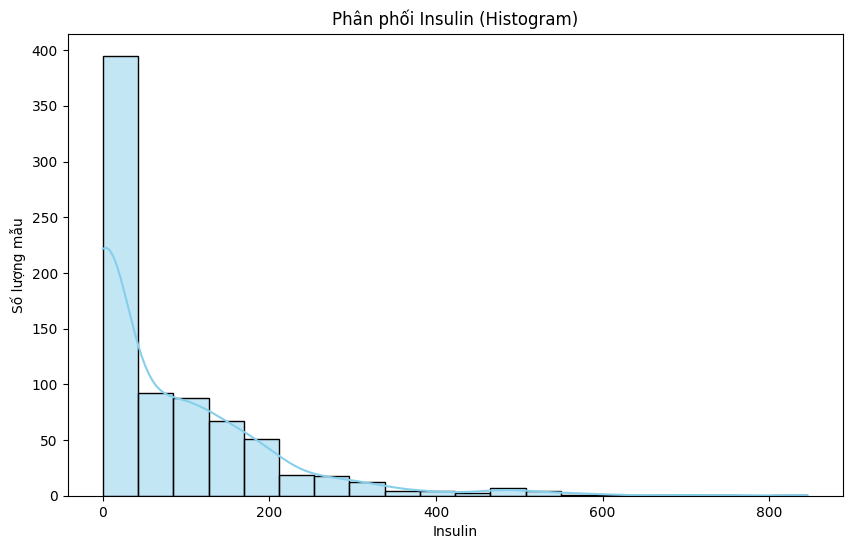

In [ ]:
# Histogram
plt.figure(figsize=(10,6))
sns.histplot(df["Insulin"], bins=20, kde=True, color="skyblue")
plt.title("Phân phối Insulin (Histogram)")
plt.xlabel("Insulin")
plt.ylabel("Số lượng mẫu")

# plt.savefig("insulin_histogram.pdf", format="pdf", bbox_inches="tight")
plt.show()

**Nhận xét**

*   Hình dạng phân phối : Phân phối lệch phải rõ rệt (right-skewed), nhiều người có mức Insulin rất thấp tập trung ở gần giá trị 0. Xuất hiện khá nhiều giá trị cực lớn trải dài đến trên 800.

*   Giá trị trung tâm : ở mức khá thấp (≈ 80 µU/mL), cho thấy đa số bệnh nhân có nồng độ insulin nằm trong khoảng thấp đến trung bình.

*   Độ phân tán : Rất rộng, trải từ 0 cho đến hơn 800 µU/mL.

*   Giá trị ngoại lai : Xuất hiện nhiều giá trị bằng 0 (không thực tế về mặt sinh học). Ngoài ra còn nhiều ngoại lai cao (trên 300–400 µU/mL), phản ánh tình trạng kháng insulin nặng.

---

*Xét các khoảng giá trị :*

*   0 (Missing): số lượng mẫu rất lớn, có thể do lỗi hoặc không đo được insulin.
*   0 – 100 µU/mL: tần suất cao nhất, chiếm đa số và là mức insulin thường gặp.

*   100 – 200 µU/mL: tần suất giảm dần, nhóm này có thể là người bắt đầu có rối loạn điều hòa insulin.

*   Trên 200 µU/mL: ít xuất hiện, nhưng phản ánh kháng insulin nghiêm trọng, thường liên quan đến tiểu đường type 2.


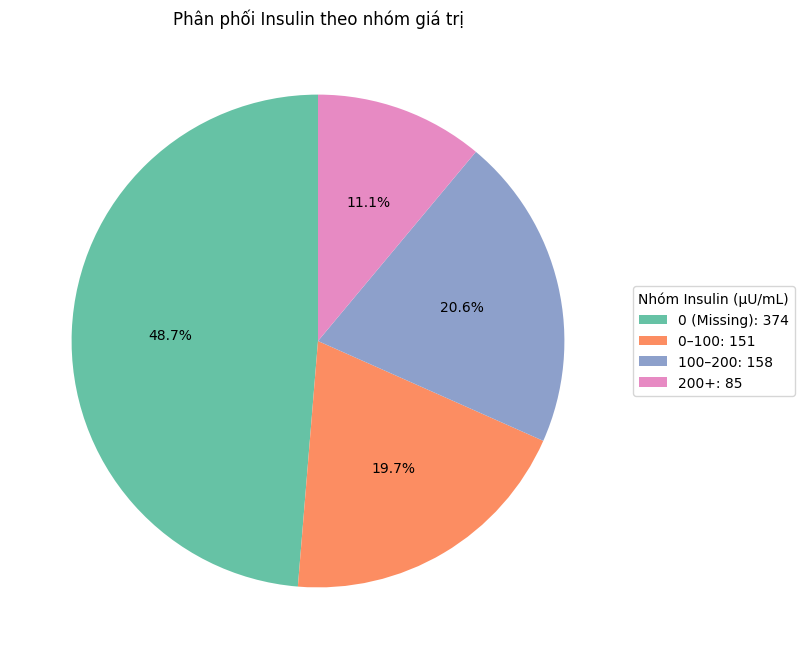

In [ ]:
#  Biểu đồ phân phối các nhóm Insulin
bins = [-1, 0, 100, 200, df["Insulin"].max()]
labels = ["0 (Missing)", "0–100", "100–200", "200+"]

df["Insulin_Group"] = pd.cut(df["Insulin"], bins=bins, labels=labels)
count_data = df["Insulin_Group"].value_counts().sort_index()
percent_data = (count_data / count_data.sum() * 100).round(1)

# Vẽ biểu đồ tròn
plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(
    count_data,
    startangle=90,
    colors=plt.cm.Set2.colors,
    autopct="%1.1f%%",
    textprops={'fontsize': 10, 'color': 'black'}
)
legend_labels = [f"{grp}: {count}"
                 for grp, count, perc in zip(count_data.index, count_data.values, percent_data.values)]

plt.legend(
    wedges,
    legend_labels,
    title="Nhóm Insulin (µU/mL)",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.title("Phân phối Insulin theo nhóm giá trị")

# plt.savefig("insulinGroup_pie.pdf", format="pdf", bbox_inches="tight")
plt.show()





**Kết luận chung**

*   Phân phối Insulin không đồng đều, nhiều giá trị thiếu (0) bất thường, có thể vì khó khăn trong đo lường và giá trị 0 được thay thế cho Missing Value.

*   Đối với ngoại lai cao, ta cần xem xét nếu là số đo thực tế (kháng insulin nặng) thì giữ lại để nghiên cứu. Còn nếu nghi ngờ là sai số đo (>  400) thì nên loại bỏ.

*   Insulin là hormone điều chỉnh lượng đường trong máu, tình trạng kháng insulin là do tuyến tụy phải tiết nhiều insulin để kiểm soát đường huyết gây ra nồng độ Insulin cao

*   Đặc trưng này quan trọng trong việc đánh giá kháng insulin và nguy cơ tiểu đường, nhưng dữ liệu có khá nhiều ngoại lai cần được xử lý kỹ.

In [ ]:
# Đếm số giá trị Insulin > 400 ( ngoại lai cao - nên loại bỏ)
outliers_high_df = df[df["Insulin"] > 400]
outliers_high = len(outliers_high_df)
pd.set_option("display.max_columns", None)
print(f"Số giá trị Insulin > 400 (ngoại lai cao): {outliers_high}")
print("Các dòng có Insulin > 400:")
print(outliers_high_df.loc[:, : "Outcome"])



Số giá trị Insulin > 400 (ngoại lai cao): 20
Các dòng có Insulin > 400:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
8              2      197             70             45      543  30.5                     0.158   53        1
13             1      189             60             23      846  30.1                     0.398   59        1
111            8      155             62             26      495  34.0                     0.543   46        1
153            1      153             82             42      485  40.6                     0.687   23        0
186            8      181             68             36      495  30.1                     0.615   60        1
220            0      177             60             29      478  34.6                     1.072   21        1
228            4      197             70             39      744  36.7                     2.329   31        0
247            0      165             90

Câu hỏi đặt ra :
* Bệnh nhân bắt đầu có dấu hiệu rối loạn điều hòa Insulin thì có nguy cơ mắc bênh tiểu đường đúng không?
* Có phải bệnh nhân nào có chỉ số Insulin cao bất thường thì đều mắc bệnh tiểu đường không ? Nếu khoogn thì còn phải dựa vào các đặc trưng nào khác?

## BMI

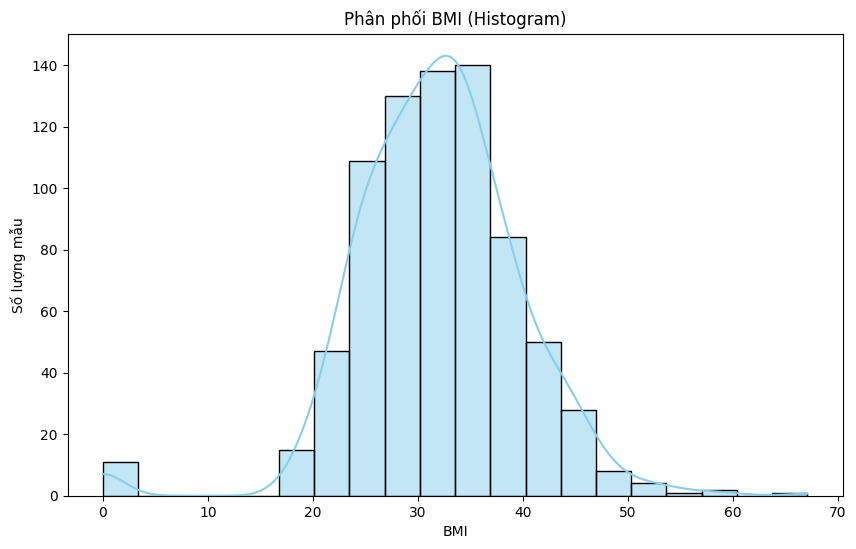

In [ ]:
# Histogram + KDE
plt.figure(figsize=(10,6))
sns.histplot(df["BMI"], bins=20, kde=True, color="skyblue")
plt.title("Phân phối BMI (Histogram)")
plt.xlabel("BMI")
plt.ylabel("Số lượng mẫu")

# plt.savefig("bmi_histogram.pdf", format="pdf", bbox_inches="tight")
plt.show()

**Nhận xét**

*   Hình dạng phân phối : BMI tập trung nhiều nhất trong khoảng 25–35, tức là phần lớn người tham gia nằm trong nhóm thừa cân hoặc béo phì mức nhẹ.

*   Giá trị trung tâm : khoảng 30, điều này cho thấy nhóm người được khảo sát nhìn chung có tình trạng thừa cân rõ rệt.

*   Độ phân tán : Dữ liệu trải rộng từ rất thấp (0) đến hơn 60, nhưng hầu hết tập trung ở mức 20–40.

*   Giá trị ngoại lai : Các giá trị bằng 0 hoặc >50 cần được chú ý, vì không phản ánh đúng thực tế lâm sàng.

---

*Xét các khoảng giá trị :*

*   Dưới 18.5 (gầy): rất ít.

*   25–35: chiếm tỷ lệ cao nhất, đa số người tham gia đang ở mức thừa cân hoặc béo phì nhẹ.

*   Trên 40 (béo phì nặng): có tồn tại nhưng hiếm gặp.



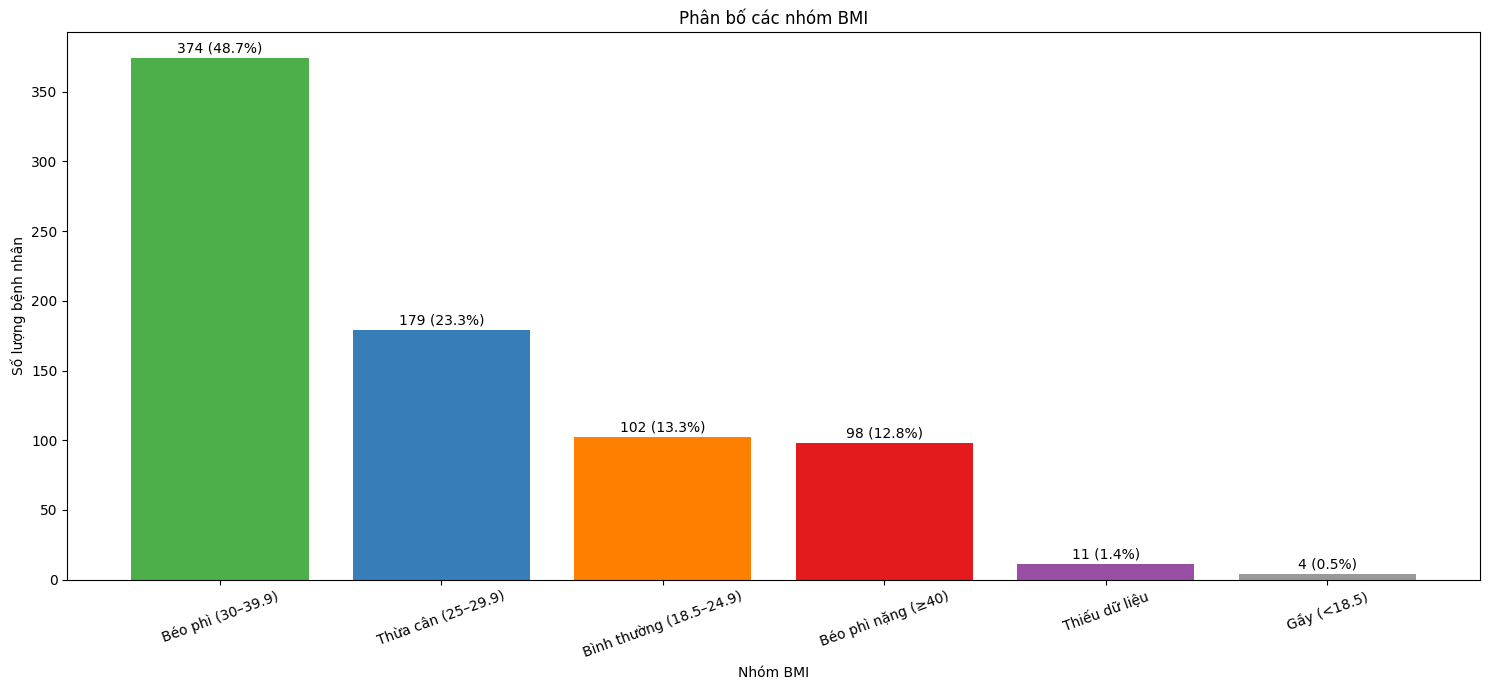

In [ ]:
# Biểu đồ phân phối BMI theo nhóm
def categorize_bmi(bmi):
    if bmi == 0:
        return "Thiếu dữ liệu"
    elif bmi < 18.5:
        return "Gầy (<18.5)"
    elif 18.5 <= bmi < 25:
        return "Bình thường (18.5–24.9)"
    elif 25 <= bmi < 30:
        return "Thừa cân (25–29.9)"
    elif 30 <= bmi < 40:
        return "Béo phì (30–39.9)"
    else:
        return "Béo phì nặng (≥40)"

# Gán nhóm BMI
df["BMI_Group"] = df["BMI"].apply(categorize_bmi)

# Tính số lượng và %
bmi_counts = df["BMI_Group"].value_counts()
bmi_percent = (bmi_counts / bmi_counts.sum() * 100).round(1)

# Tạo danh sách màu cho từng nhóm
colors = ["#4daf4a", "#377eb8", "#ff7f00", "#e41a1c", "#984ea3", "#999999"]

# Vẽ bar chart nhiều màu
plt.figure(figsize=(15,7))
bars = plt.bar(bmi_counts.index, bmi_counts.values, color=colors[:len(bmi_counts)])

# Hiển thị số lượng và %
for bar, count, perc in zip(bars, bmi_counts.values, bmi_percent.values):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 2,
        f"{count} ({perc}%)",
        ha="center", va="bottom", fontsize=10
    )

plt.title("Phân bố các nhóm BMI")
plt.xlabel("Nhóm BMI")
plt.ylabel("Số lượng bệnh nhân")
plt.xticks(rotation=20)
plt.tight_layout()

# plt.savefig("bmiGroup_bar.pdf", format="pdf", bbox_inches="tight")
plt.show()



**Kết luận chung:** Nhóm nghiên cứu chủ yếu gồm những người có BMI cao, điều này gợi ý rằng thừa cân/béo phì là đặc điểm nổi bật trong nhóm bệnh nhân. Đây là một yếu tố nguy cơ đã được y văn chứng minh liên quan tới bệnh tiểu đường type 2.

**Câu hỏi đặt ra:**

*  Trong nhóm thừa cân (25–30) so với nhóm béo phì (>30), nguy cơ mắc bệnh khác nhau thế nào?

*  Nếu phần lớn bệnh nhân thừa cân/béo phì, liệu có cần kiểm soát thêm yếu tố kết hợp như huyết áp hay glucose để hiểu rõ hơn nguy cơ bệnh?

## DiabetesPedigreeFunction

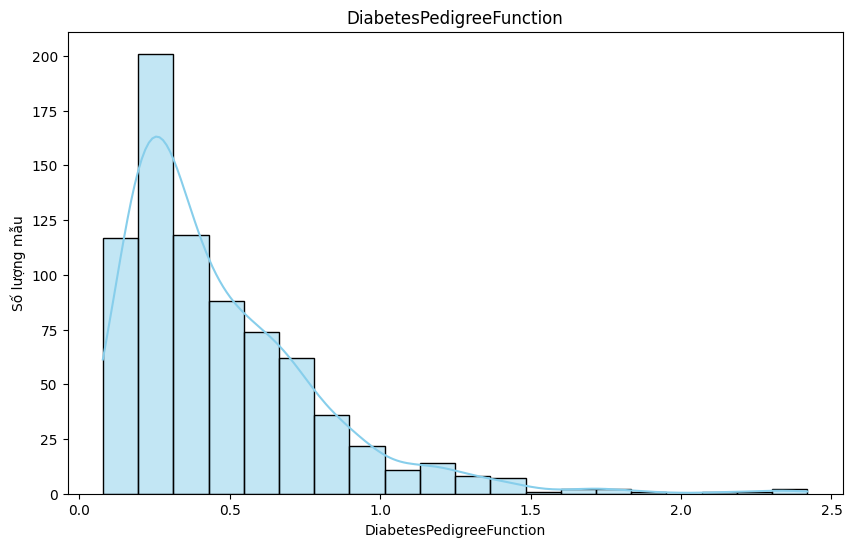

In [ ]:
# Histogram
plt.figure(figsize=(10,6))
sns.histplot(df["DiabetesPedigreeFunction"], bins=20, kde=True, color="skyblue")
plt.title("DiabetesPedigreeFunction")
plt.ylabel("Số lượng mẫu")

# plt.savefig("dpf_histogram.pdf", format="pdf", bbox_inches="tight")
plt.show()

**Nhận xét**

*   Hình dạng phân phối : phân phối lệch phải (right-skewed) rõ rệt. Phần lớn giá trị nằm ở khoảng thấp (< 1), nhưng vẫn có một số trường hợp cao bất thường (> 2.5).
*   Giá trị trung tâm : Trung vị ≈ 0.372, trung bình ≈ 0.472 (tham khảo từ tập dữ liệu).

*   Độ phân tán : DPF dao động từ 0.078 đến 2.42, thể hiện độ phân tán khá lớn. Trên 90% dữ liệu nằm trong khoảng 0 – 1, tức hầu hết bệnh nhân thuộc nhóm nguy cơ di truyền thấp.

*   Giá trị ngoại lai : Một số bệnh nhân có DPF > 1.5, đây là nhóm nguy cơ di truyền cao và cần được chú ý.

---

*Xét các khoảng giá trị :*

*   0 – 0.5: chiếm đa số, phần lớn bệnh nhân ít yếu tố di truyền từ gia đình.

*   0.5 – 1.0: nhóm trung bình, chiếm tỷ lệ vừa phải.

*   Trên 1.0: nhóm hiếm, nhưng quan trọng vì có khả năng rủi ro cao hơn

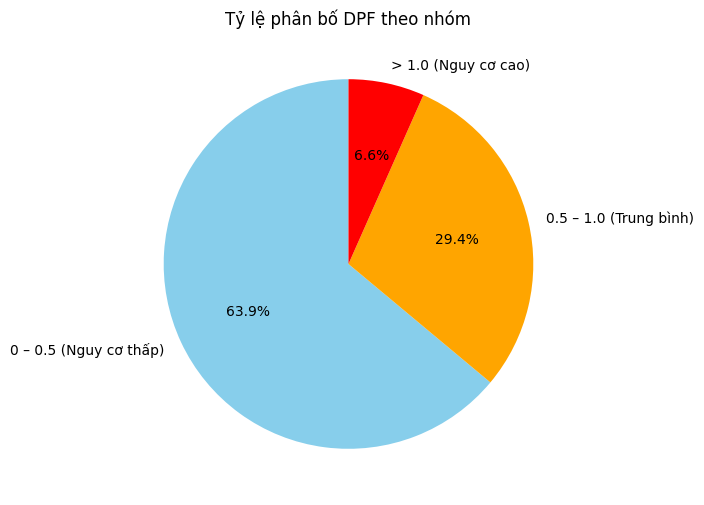

In [ ]:
# Biểu đồ phân phối chỉ số DPF theo các nhóm
def categorize_dpf(x):
    if x < 0.5:
        return "0 – 0.5 (Nguy cơ thấp)"
    elif x < 1.0:
        return "0.5 – 1.0 (Trung bình)"
    else:
        return "> 1.0 (Nguy cơ cao)"

df["DPF_Group"] = df["DiabetesPedigreeFunction"].apply(categorize_dpf)

group_counts = df["DPF_Group"].value_counts().sort_index()

plt.figure(figsize=(6,6))
plt.pie(group_counts, labels=group_counts.index, autopct="%1.1f%%", startangle=90, colors=["skyblue","orange","red"])
plt.title("Tỷ lệ phân bố DPF theo nhóm")

# plt.savefig("dpfGroup_pie.pdf", format="pdf", bbox_inches="tight")
plt.show()

**Kết luận chung**

*   DPF là chỉ số quan trọng phản ánh di truyền tiểu đường trong gia đình.

*   Phần lớn bệnh nhân Pima thuộc nhóm nguy cơ thấp, giá trị ngoại lai không phải lỗi dữ liệu mà thường phản ánh gia đình có nhiều thành viên mắc tiểu đường. Đây là những ngoại lệ quan trọng cần được lưu ý, vì có thể phản ánh gia đình có nhiều thành viên mắc tiểu đường.

**Câu hỏi đặt ra** : Liệu các giá trị ngoại lai (DPF > 2) có phản ánh chỉ số di truyền cao có thực sự ảnh hưởng đến chẩn đoán mắc tiểu đường hay có khả năng đo sai?


## Pregnancies

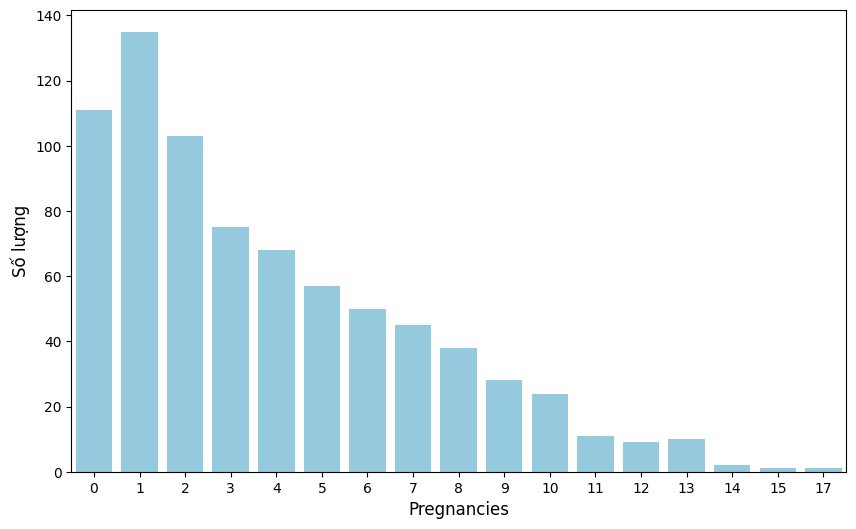

In [ ]:
# count plot
plt.figure(figsize=(10,6))
sns.countplot(x='Pregnancies', data=df, color= "skyblue")
plt.xlabel("Pregnancies", fontsize=12)
plt.ylabel("Số lượng", fontsize=12)

# plt.savefig("pregnancies_count.pdf", format="pdf", bbox_inches="tight")
plt.show()

**Nhận xét**

*   Hình dạng phân phối : Biểu đồ phân phối lệch phải (right-skewed), phần lớn bệnh nhân có số lần mang thai từ 0 đến 5, có một số ít cá thể có tới 10–17 lần mang thai.

*   Giá trị trung tâm : ≈ 3 lần mang thai, điều này cho thấy đa số bệnh nhân có số lần mang thai thấp đến trung bình.

*   Độ phân tán : Biến Pregnancies trải từ 0 đến 17, hơn 80% dữ liệu nằm trong khoảng 0–6 lần mang thai.

*   Giá trị ngoại lai : Các trường hợp có số lần mang thai > 10 là hiếm và nằm ngoài phân bố chung.

---

*Xét các khoảng giá trị :*

*   1–3 lần: nhóm phổ biến nhất, đại diện cho đa số bệnh nhân.

*   4–6 lần: nhóm trung bình, tỷ lệ vừa phải.

*   6 lần: nhóm hiếm, có thể mang ý nghĩa đặc thù trong nghiên cứu.


In [ ]:
# Đếm số lượng bệnh nhân có số lần mang thai > 6
count_over6 = (df["Pregnancies"] > 6).sum()

total = len(df)
percent_over6 = round(count_over6 / total * 100, 2)

print(f"Số bệnh nhân có số lần mang thai > 6: {count_over6}")
print(f"Tỷ lệ phần trăm: {percent_over6}%")

Số bệnh nhân có số lần mang thai > 6: 169
Tỷ lệ phần trăm: 22.01%


**Kết luận chung**

*   Pregnancies là biến quan trọng phản ánh yếu tố sinh sản và có thể gián tiếp liên quan đến nguy cơ tiểu đường type 2

*   Nhóm có số lần mang thai cao hơn (≥6) cần được chú ý, vì có nghiên cứu cho rằng đa thai có thể làm tăng nguy cơ rối loạn chuyển hóa và tiểu đường thai kỳ.  Biến này nên được phân nhóm khi đưa vào mô hình để giảm ảnh hưởng của ngoại lai.

**Câu hỏi đặt ra**
*   Có phải nhóm bệnh nhân có nhiều lần mang thai (>6)có tỷ lệ mắc tiểu đường cao hơn so với nhóm ít lần mang thai không?


## OUTCOME

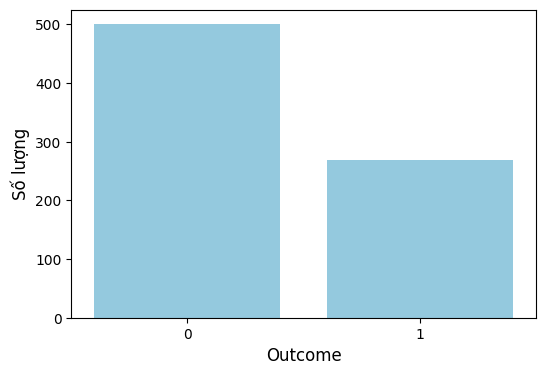

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=df, color= "skyblue")
plt.xlabel("Outcome", fontsize=12)
plt.ylabel("Số lượng", fontsize=12)

# plt.savefig("outcome_count.pdf", format="pdf", bbox_inches="tight")
plt.show()